<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Final-Project-2020-21/blob/main/TestingWeeklyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MOUNT GOOGLE DRIVE

In [29]:
from google.colab import drive
drive.mount("/content/drive")

print("\nDRIVE IS MOUNTED!!!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DRIVE IS MOUNTED!!!


### IMPORT LIBRARIES

In [30]:
!pip install chart_studio

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime as dt

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

print("LIBARARIES IMPORTED!!!")

LIBARARIES IMPORTED!!!


### IMPORT DATA

In [32]:
path = "/content/drive/My Drive/Final Project/Project Data/Testing/weekly_testing_data_europe.csv"

data = pd.read_csv(path)
print("Dimensions of Data: ", data.shape)

Dimensions of Data:  (1011, 9)


In [33]:
data.head()

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,2041,12339,8858775,139.285624,16.541049,Manual webscraping
1,Austria,AT,2020-W16,855,58488,8858775,660.226724,1.461838,Manual webscraping
2,Austria,AT,2020-W17,472,33443,8858775,377.512692,1.411357,Manual webscraping
3,Austria,AT,2020-W18,336,26598,8858775,300.244673,1.263253,Country website
4,Austria,AT,2020-W19,307,42153,8858775,475.833284,0.728299,Country website


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

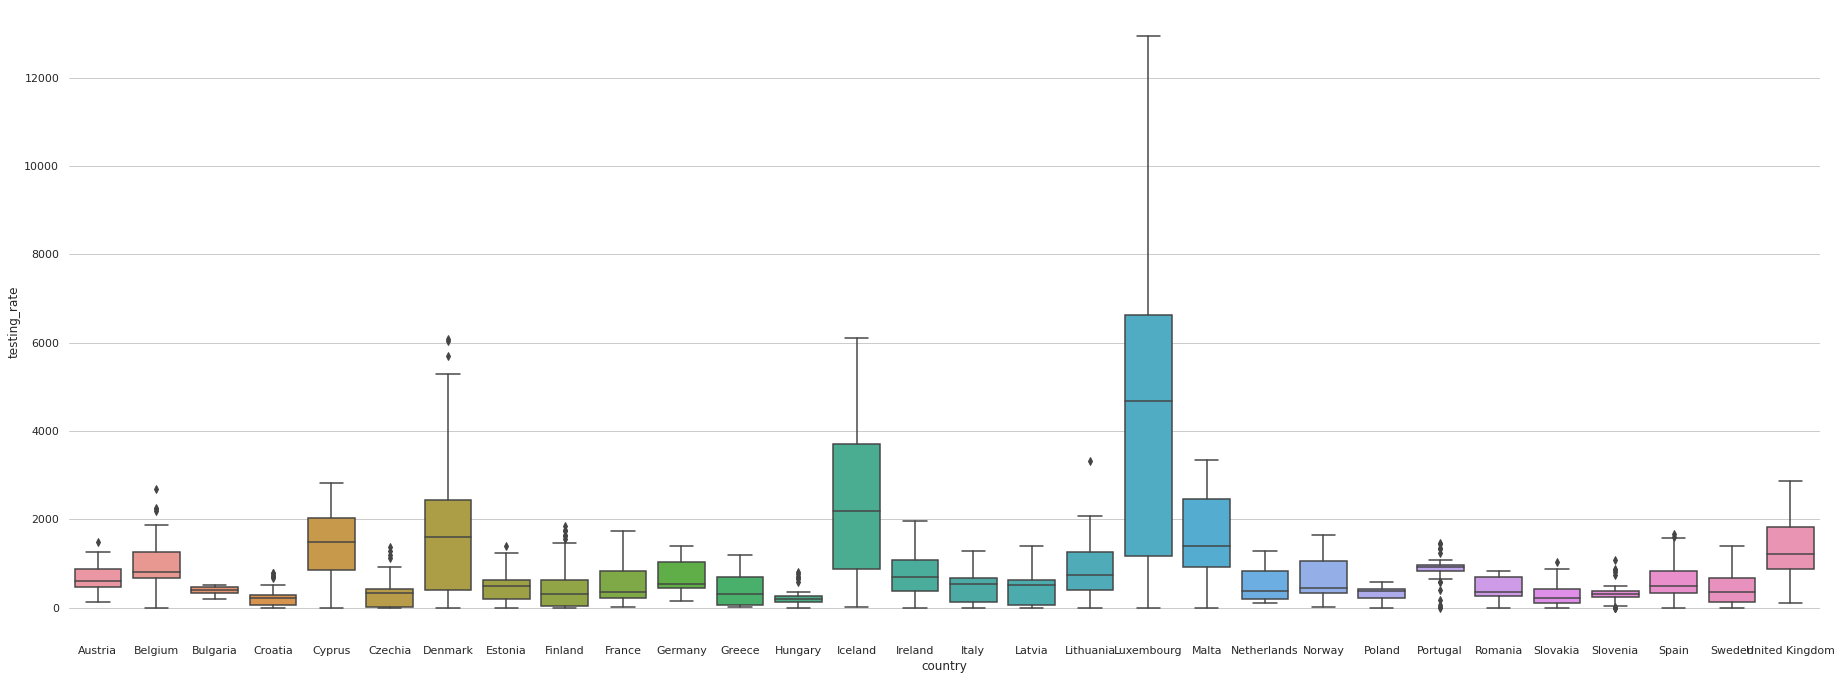

In [35]:
sns.set_style("whitegrid")
g = sns.catplot(x="country", y="testing_rate", data=data, kind = "box")
g.fig.set_figwidth(35)
g.fig.set_figheight(10)
sns.despine(left=True, bottom=True)

In [36]:
fig = px.bar(data, x='country', y="positivity_rate", animation_frame = "year_week", color = "positivity_rate")
fig.show()

In [ ]:
fig = go.Figure(go.Bar(x = data.country, y = data.positivity_rate, name='Positivity Rate'))
fig.add_trace(go.Bar(x = data.country, y = data.tests_done, name='Testing Done'))
fig.add_trace(go.Bar(x = data.country, y = data.new_cases, name='New Cases'))
#fig.add_trace(go.Bar(x = data.country, y = data.testing_rate, name='Testing Rate'))

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

fig.update_layout(barmode='stack')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [ ]:
data[['new_cases', 'tests_done']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of Day',
    yTitle='(%) of Articles',
    title='Time Started and Time Published')